In [1]:
from skimage.io import imshow
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize

In [5]:
img = imread('00_input/train/images/00294.jpg', mode="RGB")

In [6]:
print(img.shape)

(124, 124, 3)


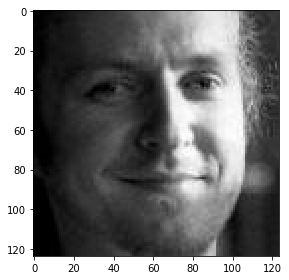

In [7]:
imshow(img)
plt.show()

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('00_input/train/gt.csv', index_col='filename')
print(data.head())

           x1   y1   x2  y2   x3  y3   x4  y4  x5   y5 ...   x10  y10  x11  \
filename                                               ...                   
00000.jpg  51   51  127  60  169  65  203  52  68   77 ...   193   84  156   
00001.jpg  21   20   36  18   57  19   80  25  23   27 ...    78   33   43   
00002.jpg  23  116   39  83   47  57   56  19  36  115 ...    62   31   91   
00003.jpg  29   18   63  25   84  32  105  34  38   31 ...    95   45   72   
00004.jpg  31   53   76  44  107  38  136  33  40   67 ...   129   49  111   

           y11  x12  y12  x13  y13  x14  y14  
filename                                      
00000.jpg  144   92  174  140  180  168  179  
00001.jpg   46   31   61   45   66   60   65  
00002.jpg   86  106  122  115  100  121   81  
00003.jpg   71   46   83   63   87   75   89  
00004.jpg  105   72  137  106  132  126  121  

[5 rows x 28 columns]


In [10]:
dots = np.array(data.loc['00294.jpg'])
x_dots = dots[::2]
y_dots = dots[1::2]

In [11]:
for i in range(0, len(x_dots)):
    img[y_dots[i]][x_dots[i]] = (255, 0, 0)

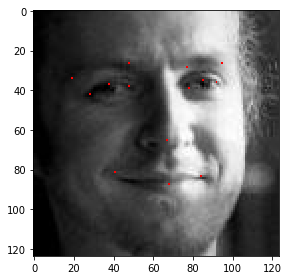

In [12]:
imshow(img)
plt.show()

In [13]:
img_resized = imresize(img, size=(64, 64), interp='cubic')
x_dots_resized = x_dots / img.shape[1]
y_dots_resized = y_dots / img.shape[0]

In [14]:
print(x_dots_resized, y_dots_resized)
dots_resized = []
for i in range(len(x_dots_resized)):
    dots_resized.append(x_dots_resized[i])
    dots_resized.append(y_dots_resized[i])
dots_resized = np.array(dots_resized)
print(dots_resized)

[ 0.15322581  0.38709677  0.62096774  0.76612903  0.22580645  0.30645161
  0.38709677  0.62903226  0.68548387  0.74193548  0.54032258  0.33064516
  0.5483871   0.67741935] [ 0.27419355  0.20967742  0.22580645  0.20967742  0.33870968  0.2983871
  0.30645161  0.31451613  0.28225806  0.29032258  0.52419355  0.65322581
  0.7016129   0.66935484]
[ 0.15322581  0.27419355  0.38709677  0.20967742  0.62096774  0.22580645
  0.76612903  0.20967742  0.22580645  0.33870968  0.30645161  0.2983871
  0.38709677  0.30645161  0.62903226  0.31451613  0.68548387  0.28225806
  0.74193548  0.29032258  0.54032258  0.52419355  0.33064516  0.65322581
  0.5483871   0.7016129   0.67741935  0.66935484]


In [15]:
for i in range(0, len(x_dots)):
    img_resized[int(y_dots_resized[i] * 64)][int(x_dots_resized[i] * 64)] = (255, 0, 0)

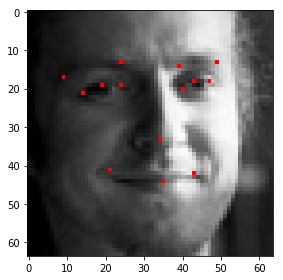

In [16]:
imshow(img_resized)
plt.show()

In [17]:
def get_resized(path, filename):
    img = imread(path + filename, mode='RGB')
    data = pd.read_csv('00_input/train/gt.csv', index_col='filename')
    dots = np.array(data.loc[filename])
    x_dots = dots[::2]
    y_dots = dots[1::2]
    img_resized = imresize(img, size=(64, 64), interp='cubic')
    x_dots_resized = x_dots / img.shape[1]
    y_dots_resized = y_dots / img.shape[0]
    dots_resized = []
    for i in range(len(x_dots_resized)):
        dots_resized.append(x_dots_resized[i])
        dots_resized.append(y_dots_resized[i])
    dots_resized = np.array(dots_resized)
    return img_resized, dots_resized

In [18]:
def load_images(path):
    X = []
    y = []
    for filename in data.index.values[:10000]:
        img_resized, dots_resized = get_resized(path, filename)
        X.append(img_resized.reshape((3, 64, 64)))
        y.append(dots_resized)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [19]:
path = '00_input/train/images/'

In [20]:
X, y = load_images(path)

In [21]:
print(X.shape)

(6000, 3, 64, 64)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [23]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(2, 2), input_shape=(3, 64, 64)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(28))
model.add(Activation('sigmoid'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='mse')

In [25]:
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
6000/6000 [==============================] - 3s - loss: 0.0038     
Epoch 2/10
6000/6000 [==============================] - 3s - loss: 0.0031     
Epoch 3/10
6000/6000 [==============================] - 3s - loss: 0.0030     
Epoch 4/10
6000/6000 [==============================] - 3s - loss: 0.0030     
Epoch 5/10
6000/6000 [==============================] - 2s - loss: 0.0030     
Epoch 6/10
6000/6000 [==============================] - 2s - loss: 0.0030     
Epoch 7/10
6000/6000 [==============================] - 3s - loss: 0.0030     
Epoch 8/10
6000/6000 [==============================] - 2s - loss: 0.0030     
Epoch 9/10
6000/6000 [==============================] - 3s - loss: 0.0030     
Epoch 10/10
6000/6000 [==============================] - 3s - loss: 0.0030     


In [26]:
proba = model.predict(X)

In [27]:
print(proba[0])

[ 0.18914656  0.24781597  0.37078896  0.23515476  0.58209342  0.22703619
  0.77559543  0.21052627  0.2440879   0.3314887   0.31314364  0.32542551
  0.38713703  0.33041194  0.59272063  0.31928951  0.66154647  0.29998502
  0.73445719  0.30068502  0.50831693  0.52320325  0.38908851  0.67386085
  0.52189541  0.67869723  0.65194929  0.66005808]


In [28]:
X_test, y_test = load_images(path)

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(y_pred[0], y_pred[1])

[ 0.18914656  0.24781597  0.37078896  0.23515476  0.58209342  0.22703619
  0.77559543  0.21052627  0.2440879   0.3314887   0.31314364  0.32542551
  0.38713703  0.33041194  0.59272063  0.31928951  0.66154647  0.29998502
  0.73445719  0.30068502  0.50831693  0.52320325  0.38908851  0.67386085
  0.52189541  0.67869723  0.65194929  0.66005808] [ 0.18914656  0.24781597  0.37078896  0.23515476  0.58209342  0.22703619
  0.77559543  0.21052627  0.2440879   0.3314887   0.31314364  0.32542551
  0.38713703  0.33041194  0.59272063  0.31928951  0.66154647  0.29998502
  0.73445719  0.30068502  0.50831693  0.52320325  0.38908851  0.67386085
  0.52189541  0.67869723  0.65194929  0.66005808]


In [30]:
# from sklearn.metrics import mean_squared_error

In [31]:
print(mean_squared_error(y_true=y_test, y_pred=y_pred) * 64)

NameError: name 'mean_squared_error' is not defined

In [32]:
x_dots_resized = y_pred[0][::2]
y_dots_resized = y_pred[0][1::2]
img_resized = X_test[0].reshape(64, 64, 3)

In [ ]:
for i in range(0, len(y_dots_resized)):
    img_resized[int(y_dots_resized[i] * 64)][int(x_dots_resized[i] * 64)] = (255, 0, 0)

In [ ]:
imshow(img_resized)
plt.show()